# K-Means

- How do we define the middle of a set of points? There are actually
two things that we need to define:

__A distance measure__ It is often the normal Euclidean distance, but there are other alternatives;

__The mean average__ Once we have a distance measure, we can compute the central point of a set of datapoints, which is the mean average.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


In [2]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
labels = iris.target
target_ids = np.unique(labels)#labels = array([0, 1, 2])
data = X

## The K-Means Algorithm
- __Initialisation__
    - choose a value for k, which corresponds to the number of output nodes
    - initialise the weights to have small random values
    - assign the cluster centres $\mu_j$ to those positions

In [3]:
nData = np.shape(data)[0]
nDim = np.shape(data)[1]
k = 3

minima = data.min(axis=0)
maxima = data.max(axis=0)
	
# Pick the centre locations randomly
centres = np.random.rand(k,nDim)*(maxima-minima)+minima
oldCentres = np.random.rand(k,nDim)*(maxima-minima)+minima
count = 0

print centres
print oldCentres

[[6.18731582 3.66524498 2.26577913 1.00174211]
 [4.60312895 4.01214838 1.43834891 2.20603471]
 [7.41278637 2.49460832 6.2929299  0.15423174]]
[[6.29055936 3.17328851 2.80449282 0.3564602 ]
 [5.38145485 2.29677674 2.75627651 0.46829228]
 [5.01786205 3.22342    1.50394983 2.18240697]]


- __Learning__
    - repeat
        - for each datapoint $x_i$ :
         - compute the distance to each cluster centre
         - assign the datapoint to the nearest cluster centre with distance
         
         \begin{equation}
         d i = \min_{j} d(x_i , \mu_j ).
         \end{equation}

        - for each cluster centre:
            - move the position of the centre to the mean of the points in that cluster
$(N_j$ is the number of points in cluster $j$):

         \begin{equation}
         \mu_j = \frac{1}{N_{j}} \sum_{i=1}^{N_{j}} x_{i}
         \end{equation}

    - until the cluster centres stop moving

In [4]:
count = 0
    
maxIterations = 100
	#print centres
while np.sum(np.sum(oldCentres-centres))!= 0 and count<maxIterations:
	oldCentres = centres.copy()
	count += 1
	
		# Compute distances
	distances = np.ones((1,nData))*np.sum((data-centres[0,:])**2,axis=1)
	for j in range(k-1):
		distances = np.append(distances,np.ones((1,nData))*np.sum((data-centres[j+1,:])**2,axis=1),axis=0)
	
			# Identify the closest cluster
	cluster = distances.argmin(axis=0)
	cluster = np.transpose(cluster*np.ones((1,nData)))
	
			# Update the cluster centres	
	for j in range(k):
		thisCluster = np.where(cluster==j,1,0)
		if sum(thisCluster)>0:
			centres[j,:] = np.sum(data*thisCluster,axis=0)/np.sum(thisCluster)
		#plot(data[:,0],data[:,1],'kx')
		#plot(centres[:,0],centres[:,1],'ro')

- __Usage__
    - for each test point:
        - compute the distance to each cluster centre
        - assign the datapoint to the nearest cluster centre with distance
        
         \begin{equation}
         d i = \min_{j} d(x_i , \mu_j ).
         \end{equation}

In [5]:
nData = np.shape(data)[0]
		# Compute distances
distances = np.ones((1,nData))*np.sum((data-centres[0,:])**2,axis=1)
for j in range(k-1):
	distances = np.append(distances,np.ones((1,nData))*np.sum((data-centres[j+1,:])**2,axis=1),axis=0)
	
		# Identify the closest cluster
cluster = distances.argmin(axis=0)
#cluster = np.transpose(cluster*np.ones((1,nData)))

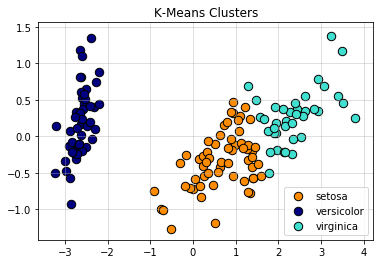

In [6]:
colors = ['darkorange', 'navy', 'turquoise']

X = iris.data


from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)

X_pca = pca.transform(X)


y = cluster.T
for i, c, label in zip(target_ids, colors, iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
               c=c, edgecolors='black', s=285,label=label, marker='.')
plt.title('K-Means Clusters')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

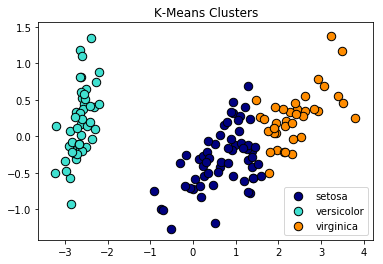

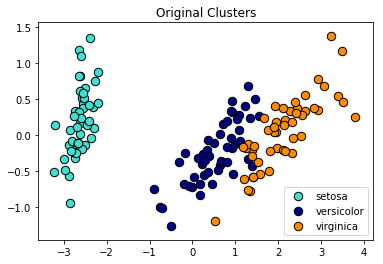

In [8]:
colors = ['navy', 'turquoise', 'darkorange']

X = iris.data
y = iris.target

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)
y = kmeans.labels_

X_pca = pca.transform(X)

for i, c, label in zip(target_ids, colors, iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
               c=c, edgecolors='black', s=285,label=label, marker='.')
plt.title('K-Means Clusters')
plt.legend()
plt.show()

colors = ['turquoise','navy',  'darkorange']

from sklearn.decomposition import PCA


y = iris.target
target_ids = np.unique(labels)#labels = array([0, 1, 2])
pca = PCA(n_components=2).fit(X)

X_pca = pca.transform(X)

for i, c, label in zip(target_ids, colors, iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
               c=c, edgecolors='black', s=285,label=label, marker='.')
plt.title('Original Clusters')
plt.legend()
plt.show()

In [9]:
from sklearn.decomposition import PCA


y = iris.target
target_ids = np.unique(labels)#labels = array([0, 1, 2])
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [11]:
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

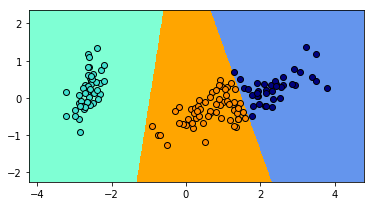

In [12]:
from matplotlib.colors import ListedColormap
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['aquamarine', 'cornflowerblue', 'orange'])
y = kmeans.labels_

for i, c, label in zip(target_ids, colors, iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
               c=c,edgecolor='k', label=label)
plt.imshow(Z, extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=cmap_light, origin='lower')

plt.show()

## References
[
Machine Learning: An Algorithmic Perspective: Stephen Marsland ](http://dai.fmph.uniba.sk/courses/ICI/References/marsland.machine-learning.2ed.2015.pdf)